# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mousestudy_merged = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

# Display the data table for preview
mousestudy_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [61]:
# Checking the number of mice.
len(mousestudy_merged["Mouse ID"].unique())

249

In [62]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Finding duplicates
duplicates = mousestudy_merged[mousestudy_merged.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Displaying duplicates
print(duplicates)
print(duplicates["Mouse ID"].unique())

#Seems like g989 is out duplicate mice ID

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   

      Tumor Volume (mm3)  Metastatic Sites  
107            45.000000                 0  
137            45.000000                 0  
329            48.786801                 0  
360            4

In [63]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_ids = mousestudy_merged[mousestudy_merged.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
cleaned_df = mousestudy_merged[~mousestudy_merged['Mouse ID'].isin(duplicate_ids)]

In [65]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

248

In [66]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped = cleaned_df.groupby('Drug Regimen')

# Calculate each statistic
mean = grouped['Tumor Volume (mm3)'].mean()
median = grouped['Tumor Volume (mm3)'].median()
variance = grouped['Tumor Volume (mm3)'].var()
std_dev = grouped['Tumor Volume (mm3)'].std()
sem = grouped['Tumor Volume (mm3)'].sem()

# Combine into a single DataFrame
summary_table = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume SEM': sem
})

# Display the summary table
summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_df = cleaned_df.groupby('Drug Regimen')

# Calculating statistics
summary_table = grouped_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Displaying the summary table
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Data Points per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

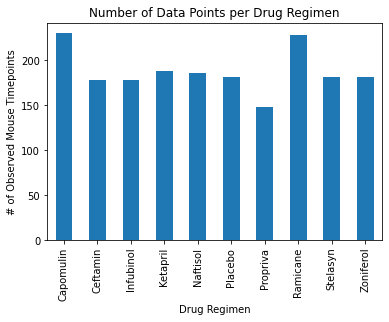

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Counting the number of occurrences for each drug regimen
count_by_regimen = cleaned_df.groupby('Drug Regimen').count()['Mouse ID']

# Plotting the bar chart
count_by_regimen.plot(kind='bar', title='Number of Data Points per Drug Regimen', ylabel="# of Observed Mouse Timepoints")


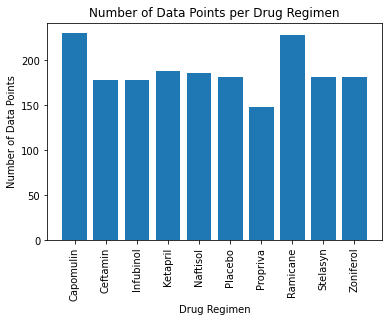

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Getting names of drug regimens and their counts
regimens = count_by_regimen.index
counts = count_by_regimen.values

# Plotting the bar chart using Pyplot
plt.bar(regimens, counts)

# Adding title and labels
plt.title('Number of Data Points per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation = 90)

# Showing the plot
plt.show()

<AxesSubplot:ylabel='Sex'>

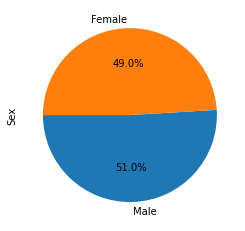

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_df['Sex'].value_counts()

gender_counts.plot.pie(autopct='%1.1f%%', startangle=180)
#gender_df.plot(kind='pie')
#plt.show()

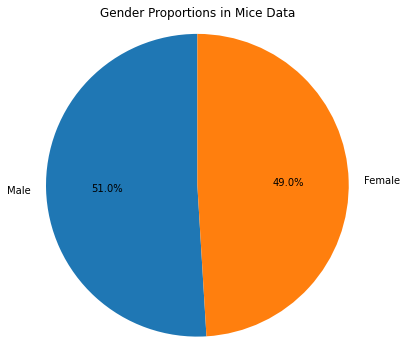

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = gender_counts.index
counts = gender_counts.values
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.pie(counts, labels=gender, autopct='%1.1f%%', startangle=90)
plt.title('Gender Proportions in Mice Data')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_df[cleaned_df['Drug Regimen'].isin(treatment_regimens)]

# Group by Mouse ID and Drug Regimen, then find the maximum Timepoint for each group
max_timepoint = filtered_data.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max().reset_index()

# Merge the max timepoint back with the original data to get the tumor volume at the final timepoint
final_tumor_volume = pd.merge(max_timepoint, filtered_data, on=['Mouse ID', 'Drug Regimen', 'Timepoint'])

# Display the final tumor volumes
final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]



,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543
...,...,...,...,...
95,y769,Ceftamin,45,68.594745
96,y793,Capomulin,45,31.896238
97,y865,Ceftamin,45,64.729837
98,z578,Ramicane,45,30.638696


In [74]:
# Treatment regimens list
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to fill with tumor volume data for plotting
tumor_vol_list = []

# Empty dictionary to hold IQR data and potential outliers for each treatment
treatment_analysis = {}

# For loop to calculate IQR and determine potential outliers for each treatment
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # Add subset to tumor volume list for plotting
    tumor_vol_list.append(final_volume)

    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = final_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_volume[(final_volume < lower_bound) | (final_volume > upper_bound)]

    # Store results in the dictionary
    treatment_analysis[treatment] = {
        "Lower Quartile": lowerq,
        "Upper Quartile": upperq,
        "IQR": iqr,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers": outliers
    }

# Display the analysis results
treatment_analysis

{'Capomulin': {'Lower Quartile': 32.37735684,
  'Upper Quartile': 40.1592203,
  'IQR': 7.781863460000004,
  'Lower Bound': 20.70456164999999,
  'Upper Bound': 51.83201549,
  'Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)},
 'Ramicane': {'Lower Quartile': 31.56046955,
  'Upper Quartile': 40.65900627,
  'IQR': 9.098536719999998,
  'Lower Bound': 17.912664470000003,
  'Upper Bound': 54.30681135,
  'Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)},
 'Infubinol': {'Lower Quartile': 54.04860769,
  'Upper Quartile': 65.52574285,
  'IQR': 11.477135160000003,
  'Lower Bound': 36.83290494999999,
  'Upper Bound': 82.74144559000001,
  'Outliers': 15    36.321346
  Name: Tumor Volume (mm3), dtype: float64},
 'Ceftamin': {'Lower Quartile': 48.72207785,
  'Upper Quartile': 64.29983003,
  'IQR': 15.577752179999997,
  'Lower Bound': 25.355449580000002,
  'Upper Bound': 87.66645829999999,
  'Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)}}

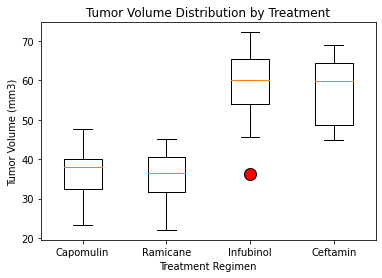

In [75]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Set up for the box plot
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_list, flierprops=dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none'))

# Set the labels and title
ax.set_title('Tumor Volume Distribution by Treatment')
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xticklabels(treatment_list)

# Show the plot
plt.show()

## Line and Scatter Plots

In [76]:
mouse_s710_data = cleaned_df[cleaned_df['Mouse ID'] == 's710']

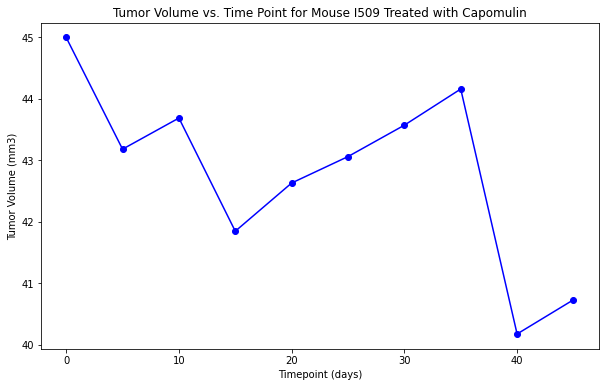

In [77]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure(figsize=(10, 6))
plt.plot(mouse_s710_data['Timepoint'], mouse_s710_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')

# Setting plot title and labels
plt.title(f"Tumor Volume vs. Time Point for Mouse I509 Treated with Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()

In [78]:
#Filtering for Capomulin in the dataframe
capomulin_data = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]

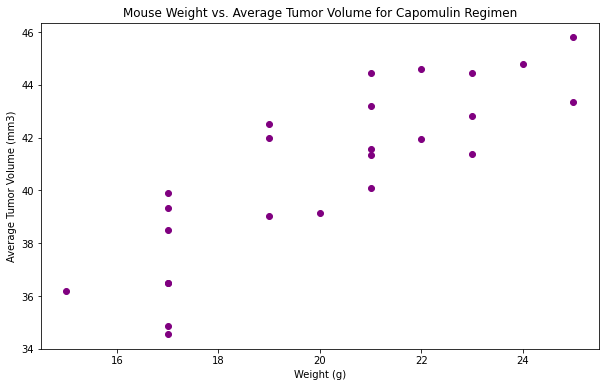

In [79]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average tumor volume for each mouse in the Capomulin regimen
average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse weight data
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()  # Getting the weight of each mouse
avg_tumor_vol_vs_weight = pd.DataFrame({'Average Tumor Volume (mm3)': average_tumor_vol, 'Weight (g)': mouse_weight})

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_vol_vs_weight['Weight (g)'], avg_tumor_vol_vs_weight['Average Tumor Volume (mm3)'], color='purple')

# Setting plot title and labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

## Correlation and Regression

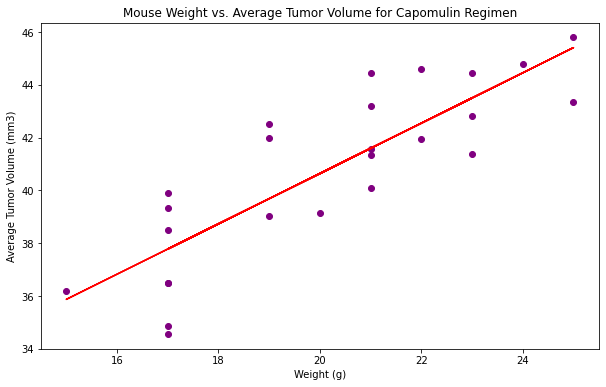

(0.8419363424694722, 0.7088568047708723)

In [80]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Calculate the Pearson correlation coefficient
correlation = avg_tumor_vol_vs_weight.corr().iloc[0, 1]

# Perform linear regression
(slope, intercept, r_value, p_value, stderr) = linregress(avg_tumor_vol_vs_weight['Weight (g)'], avg_tumor_vol_vs_weight['Average Tumor Volume (mm3)'])


# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_vol_vs_weight['Weight (g)'], avg_tumor_vol_vs_weight['Average Tumor Volume (mm3)'], color='purple')
plt.plot(avg_tumor_vol_vs_weight['Weight (g)'], slope * avg_tumor_vol_vs_weight['Weight (g)'] + intercept, 'r-')


# Setting plot title, labels, and show plot
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

correlation, r_value**2  # Returning the correlation coefficient and R-squared value

# The correlation between mouse weight and the average tumor volume is 0.84